In [3]:
import pandas as pd
import numpy as np
import math
import string
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import find

# %pip install --upgrade nltk
from nltk.stem.snowball import SnowballStemmer
import FileLocations

snowball = SnowballStemmer("english")
articles_df = pd.read_csv(FileLocations.fileLocationArticlesClean)

In [4]:
print(articles_df.columns)

def combine_columns(df):
    return " ".join([df["Title"], df["Subjects"], df["Description"]])

articles_df = articles_df.fillna("")
articles_df['all'] = articles_df.apply(lambda row: combine_columns(row), axis=1)

Index(['ID', 'Title', 'Subjects', 'Description', 'Contents', 'Notes',
       'Creation Date', 'Brief', 'Type', 'YearParsed'],
      dtype='object')


In [5]:
def has_valid_date(df):
    if df['Creation Date'] not in ['', '[]']:
        return True
    return False

articles_df['valid_date'] = articles_df.apply(lambda row: has_valid_date(row), axis=1)
print(len(articles_df[articles_df['valid_date'] == True]))
print(len(articles_df[articles_df['valid_date'] == False]))

24
35


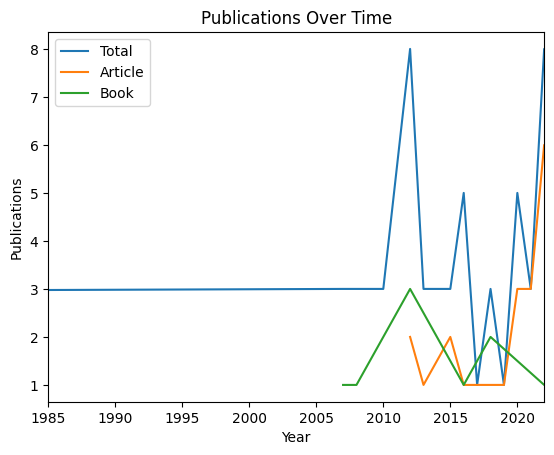

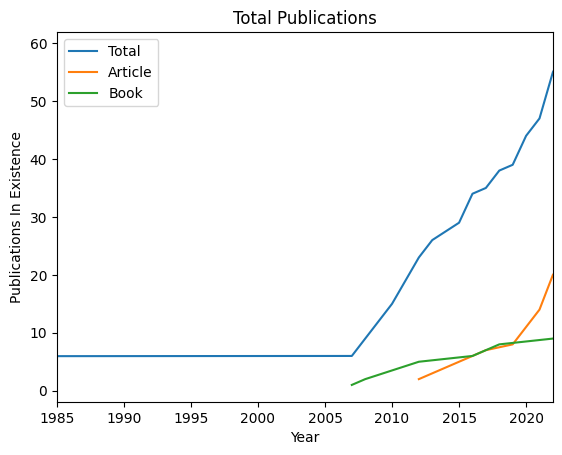

In [9]:
import matplotlib.pyplot as plt

def group_by_year(df):
    valid_years = df['YearParsed'].unique()
    valid_years.sort()
    count_year = []
    for y in valid_years:
        count_year.append(len(df[df['YearParsed'] == y]))
    return valid_years, count_year


def group_by_htd(df):
    valid_years = df['YearParsed'].unique()
    valid_years.sort()
    count_year = []
    for y in valid_years:
        count_year.append(len(df[df['YearParsed'] <= y]))
    return valid_years, count_year


def show_over_time(df):
    years_t, count_t = group_by_year(df)
    plt.plot(years_t, count_t, label="Total")
    for t in df['Type'].unique():
        t_only = df[df['Type'] == t]
        if len(t_only) < 10: 
            continue
        years_t, count_t = group_by_year(t_only)
        plt.plot(years_t, count_t, label=t)


    plt.title("Publications Over Time")
    plt.xlabel("Year")
    plt.ylabel("Publications")
    plt.xlim(left=1985, right=2022)
    plt.legend(loc="upper left")
    plt.show()


def show_htd(df):
    years_t, count_t = group_by_htd(df)
    plt.plot(years_t, count_t, label="Total")
    for t in df['Type'].unique():
        t_only = df[df['Type'] == t]
        if len(t_only) < 10: 
            continue
        years_t, count_t = group_by_htd(t_only)
        plt.plot(years_t, count_t, label=t)


    plt.title("Total Publications")
    plt.xlabel("Year")
    plt.ylabel("Publications In Existence")
    plt.xlim(left=1985, right=2022)
    plt.legend(loc="upper left")
    plt.show()
    
    
show_over_time(articles_df)
show_htd(articles_df)

In [10]:
def remove_punctuation(text):
    if text is np.nan:
        return ""
    if not isinstance(text, str):
        return text
    for i in range(len(string.punctuation)):
        text = text.replace(string.punctuation[i], " ")
    return text

print(f"Removing all '{string.punctuation}'")
articles_df['all'] = articles_df['all'].apply(remove_punctuation)

Removing all '!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'


In [11]:
def stemify(text):
    words = text.split(" ")
    output = ""
    for w in words:
        output += " " + snowball.stem(w)
    return output[1:]

print(f"Stemming all input text")
articles_df['all'] = articles_df['all'].apply(stemify)
print(articles_df)

Stemming all input text
                                                   ID  \
0                    cdi_proquest_journals_2509172321   
1                              alma991042106719802766   
2                    cdi_proquest_journals_2487734391   
3                              alma991042011482702766   
4                              alma991041654699802766   
5                              alma991042098580402766   
6                              alma991041805223902766   
7                    cdi_proquest_journals_2421245148   
8                    cdi_proquest_journals_2644596197   
9                         cdi_pubmed_primary_32501153   
10                   cdi_proquest_journals_2421245816   
11                             alma991041758806502766   
12     cdi_springer_books_10_1007_978_3_642_19385_9_3   
13                             alma991041434721802766   
14                             alma991041865243202766   
15                             alma991042011547102766   
16     

In [12]:
stop_words = ['you','he','she','they','an','the','and','or','in','on','at','is','was','were','am','are']
cv = CountVectorizer(stop_words=stop_words)
dtm = cv.fit_transform(articles_df['all'].array)
cv.vocabulary_

{'import': 923,
 'human': 880,
 'factor': 698,
 'into': 984,
 'safe': 1581,
 'robot': 1562,
 'interact': 971,
 'function': 777,
 'use': 1927,
 'bond': 259,
 'graph': 811,
 'method': 1157,
 'actuat': 79,
 'fault': 713,
 'detect': 506,
 'injuri': 952,
 'prevent': 1410,
 'safeti': 1582,
 'stiff': 1717,
 'variabl': 1938,
 'vsa': 1968,
 'help': 851,
 'to': 1841,
 'realiz': 1481,
 'post': 1393,
 'collis': 359,
 'strategi': 1723,
 'for': 750,
 'of': 1280,
 'will': 2007,
 'be': 219,
 'reduc': 1500,
 'protect': 1445,
 'user': 1929,
 'from': 771,
 'when': 1994,
 'between': 240,
 'occur': 1276,
 'howev': 875,
 'has': 836,
 'mechan': 1142,
 'limit': 1076,
 'constraint': 407,
 'that': 1807,
 'can': 287,
 'caus': 305,
 'harm': 834,
 'even': 652,
 'if': 898,
 'minim': 1169,
 'accord': 67,
 'this': 1828,
 'articl': 165,
 'concept': 387,
 'combin': 360,
 'danger': 463,
 'index': 937,
 'robust': 1566,
 'isol': 998,
 'present': 1406,
 'appli': 147,
 'active': 77,
 'pass': 1336,
 'elast': 582,
 'apvsea': 

In [14]:
# do our desired terms exist?

def check_term(vocab, word):
    index = cv.vocabulary_[word] if word in cv.vocabulary_ else -1
    print(f"{word}: {index}")
    return index

demographics = {
    "elderly": ["elderly", "senior"],
    "children": ["children", "child", "kid"],
    "nonnuerotypical": ["autism", "nonverbal"],
    "physicallydisabled": ["blind", "deaf", "handicap", "disabled"]
}

demo_pointers = {}

for k in demographics:
    demo_pointers[k] = []
    for term in demographics[k]:
        index = check_term(cv.vocabulary_, term)
        demo_pointers[k].append(index)

elderly: -1
senior: -1
children: 329
child: 328
kid: -1
autism: 196
nonverbal: -1
blind: -1
deaf: -1
handicap: -1
disabled: -1


In [16]:
# proof of working
demographic = "children"
for d in demographics[demographic]:
    index_term = demographics[demographic].index(d)
    print(index_term, d, demo_pointers[demographic][index_term])
    if demo_pointers[demographic][index_term] == -1:
        continue
    result = find(dtm[..., demo_pointers[demographic][index_term]])
    for i in range(len(result[0])):
        index = result[0][i]
        print(f"{articles_df.iloc[index]['Type'][0:16]:16}", articles_df.iloc[index]["Title"][0:70] + "...", index, result[1][i], result[2][i])
    print()

0 children 329
Dissertation     ['Developing Emotional Security Among Children Who Have Been Adopted']... 3 0 3
Conference Proce ['The Development of an Online Research Tool to Investigate Children’s... 12 0 10

1 child 328
Dissertation     ['Developing Emotional Security Among Children Who Have Been Adopted']... 3 0 2
Video            ['Star trek /', 'Uniform Title', 'Star trek (Motion picture : 2009)']... 11 0 1
Article          ['Multimodal Child-Robot Interaction: Building Social Bonds']... 17 0 1
Dissertation     ["The Last Citizen: A Response to Rawls's Challenge on Impairment—a Th... 26 0 1
Article          ['Legal resistance to sex robots']... 40 0 1
Web Resources    ['Robot Nao expresses child-like emotions, forms bond with humans']... 50 0 1
Book             ['Social Robotics and the Good Life: The Normative Side of Forming Emo... 55 0 1

2 kid -1


In [19]:
articles_df.iloc[3]["Description"]

'[\'This study investigated the development of emotional security among 6-10 year old children who have been adopted by exposing them to an experimental condition during which they could engage with either a live dog or a robotic dog. The live dog was a certified therapy dog; the robotic dog was a FurReal® toy marketed by Hasbro as "Biscuit." Utilizing a mixed-method embedded experimental design, the experimental condition was intentionally structured to promote engagement between the participant and the dog or robot. 43 children who had been adopted from the child welfare system were randomly assigned to one of two groups. One group was exposed to a therapy dog (n=22), while another was exposed to the social robotic dog (n=21). The development of emotional security was targeted for measurement in this study using the "Reading the Mind in the Eyes Test," a test of social understanding that has been linked in the literature to oxytocin- a hormone premised to be a marker of the developme